In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy.lib.histograms import histogram
import scipy.integrate as integrate
from shapely.geometry import LineString

ModuleNotFoundError: No module named 'shapely'

2) Let B1, B2 and B3 denote 3 different fingerprint matchers that are used to generate genuine
and impostor match scores on a fixed set of fingerprint images. The mean ( ) and variance ( 2) of the
genuine and impostor score distributions resulting from the 3 different matchers are tabulated below.
Matcher Genuine Impostor

| Matcher | mean(genuine) | variance(genuine) | mean(impostor) | variance(impostor)|
| :-: | :-: | :-: | :-: | :-:|
| B1 | 10 | 25 | 60 | 25 |
| B2 | 60 |  5 | 75 |  3 |
| B3 | 40 | 15 | 70 | 25 |

Based on the score statistics, determine which one of the three matchers has performed well and which
one has performed the worst. Provide adequate numerical justification.

In [ ]:
#2)

d_prime_dict = {"B1":[],"B2":[],"B3":[]}

d_prime_B1 = (math.sqrt(2)*(abs((10)-(60))))/(math.sqrt((25)+(25)))
print ("The d-prime value of the B1 matcher =",round(d_prime_B1,2))
d_prime_dict["B1"].append (d_prime_B1)

d_prime_B2 = (math.sqrt(2)*(abs((60)-(75))))/(math.sqrt((5)+(3)))
print ("The d-prime value of the B2 matcher =",round(d_prime_B2,2))
d_prime_dict["B2"].append(d_prime_B2)

d_prime_B3 = (math.sqrt(2)*(abs((40)-(70))))/(math.sqrt((15)+(25)))
print ("The d-prime value of the B3 matcher =",round(d_prime_B3,2))
d_prime_dict["B3"].append(d_prime_B3)

In [ ]:
best_matcher = max(d_prime_dict, key = d_prime_dict.get)
print("The matcher that performed the best according to d-prime is:", best_matcher)

worst_matcher = min (d_prime_dict, key = d_prime_dict.get)
print("The matcher that performed the worst according to d-prime is:", worst_matcher)

In [ ]:
f_ratio_dict = {"B1":[],"B2":[],"B3":[]}

f_ratio_B1 = (abs((10)-(60)))/((math.sqrt(25))+(math.sqrt(25)))
print ("The f-ratio value of the B1 matcher =",round(f_ratio_B1,2))
f_ratio_dict["B1"].append (f_ratio_B1)

f_ratio_B2 = (abs((60)-(75)))/((math.sqrt(5))+(math.sqrt(3)))
print ("The f-ratio value of the B2 matcher =",round(f_ratio_B2,2))
f_ratio_dict["B2"].append (f_ratio_B2)

f_ratio_B3 = (abs((40)-(70)))/((math.sqrt(15))+(math.sqrt(25)))
print ("The f-ratio value of the B3 matcher =",round(f_ratio_B3,2))
f_ratio_dict["B3"].append (f_ratio_B3)

In [ ]:
best_matcher = max(f_ratio_dict, key = f_ratio_dict.get)
print("The matcher that performed the best according to f-ratio is:", best_matcher)

worst_matcher = min(f_ratio_dict, key = f_ratio_dict.get)
print("The matcher that performed the worst according to f-ratio is:", worst_matcher)

3) Consider a biometric matcher that generates similarity scores in the range [0, 1]. Its genuine
   and impostor score distributions are as follows: p(s|genuine)=3s^2 and p(s|impostor)=2-2s. Suppose
   the following decision rule is employed: s is classified as a genuine score if s>=n; else it is classified as
   an impostor score. Here,n E [0, 1].
   
  a) Plot the genuine and impostor distributions in a single graph.
  
  b) If n = 0.2, what is the FMR (i.e., FAR) and FNMR (i.e., FRR) of the biometric matcher?
  
  c) If n = 0.8, what is the FMR (i.e., FAR) and FNMR (i.e., FRR) of the biometric matcher?
  
  d) Write a program to compute the DET curve based on these two distributions. Plot the DET curve.

In [ ]:
# 3a)

genuine_distribution=[]
impostor_distribution =[]
temp =[]
s = 0
while s < 1:
    impostor = 2-2*s
    genuine = 3*s**2
    
    genuine_distribution.append(genuine)
    impostor_distribution.append(impostor)
    temp.append(s)
    s+=0.01
 
plt.style.use('seaborn')
plt.title("Genuine and Impostor distributions in a single graph",fontweight='bold')
plt.plot(temp,genuine_distribution, label='Genuine distribution')
plt.plot(temp,impostor_distribution, label='Impostor distribution')
plt.legend()
plt.show()


In [ ]:
#3b) 

def genuine_distribution(s):
    
    return 3*s**2
    
def impostor_distribution(s):    
    
    return 2-2*s


threshold_value = 0.2

fmr_1,error_fmr = integrate.quad(impostor_distribution,threshold_value,1)

fnmr_1,error_fnmr = integrate.quad(genuine_distribution,0,threshold_value)

print("FMR of the biometric matcher with threshold value of 0.2 = ",round(fmr_1,3))
print("FNMR of the biometric matcher with threshold value of 0.2 = ",round(fnmr_1,3))


In [ ]:
#3c)

def genuine_distribution(s):
    
    return 3*s**2
    
def impostor_distribution(s):    
    
    return 2-2*s


threshold_value = 0.8

fmr_2,error_fmr = integrate.quad(impostor_distribution,threshold_value,1)

fnmr_2,error_fnmr = integrate.quad(genuine_distribution,0,threshold_value)

print("FMR of the biometric matcher with threshold value of 0.8 = ",round(fmr_2,3))
print("FNMR of the biometric matcher with threshold value of 0.8 = ",round(fnmr_2,3))



In [ ]:
#3d)

initial_value = 0.2
final_value = 0.8
fmr_values=[]
fnmr_values=[]

while initial_value<=final_value:
    
    initial_value +=0.01
    
    fmr,error_fmr = integrate.quad(impostor_distribution,initial_value,1)

    fnmr,error_fnmr = integrate.quad(genuine_distribution,0,initial_value)
    
    
    fmr_values.append(fmr)

    fnmr_values.append(fnmr)


In [ ]:
plt.plot(fmr_values,fnmr_values)
plt.title("DET curve",fontweight='bold')
plt.xlabel('FMR',fontweight='bold')
plt.ylabel('FNMR',fontweight='bold')
plt.show()

4) This exercise involves generating match score distributions and DET curves for two different modalities
   matchers - fingerprint and hand. The fingerprint scores are similarity-based, while the hand scores
   are distance-based. The set of scores can be accessed here.
   
(a) Compute and report the mean and variance of the (a) genuine scores and (b) impostor
    scores for each matcher.
    
(b) Compute and report the d-prime value for each matcher.

(c) For each matcher, plot the histogram of genuine and impostor scores in the same graph.
    So there will be two graphs - one for the fingerprint matcher and the other for the hand matcher.

(d) Write a program that inputs a threshold value,  , for each matcher and outputs the
    False Match Rate (FMR) and False Non-match Rate (FNMR) at that threshold. Use this program
    to compute the FMR and FNMR for the following scenarios:
    
    i. Fingerprint Matcher:   = 500
    ii. Hand Matcher:   = 300

(e) Based on the program designed in (4d), write another program that inputs a set of
    genuine scores and impostor scores and plots the Detection Error Tradeoff (DET) Curve. Use this
    program to plot the DET curve for both the matchers and report the Equal Error Rate (EER).

(f) For each of the two matchers determine what the FNMR is at (a) FMR = 10%; (b) FMR
    = 5%; (c) FMR = 1%. You can determine these values from the DET curve.

In [5]:
# 4a

finger_genuine_file = open("finger_genuine.score")
finger_impostor_file = open("finger_impostor.score")
hand_genuine_file = open("hand_genuine.score")
hand_impostor_file = open("hand_impostor.score")

finger_genuine_file_list = finger_genuine_file.readlines()
finger_impostor_file_list = finger_impostor_file.readlines()
hand_genuine_file_list = hand_genuine_file.readlines()
hand_impostor_file_list = hand_impostor_file.readlines()

for values in range(len(finger_genuine_file_list)):
    finger_genuine_file_list[values] = (float(finger_genuine_file_list[values]))
    
for values in range(len(finger_impostor_file_list)):
    finger_impostor_file_list[values] = (float(finger_impostor_file_list[values]))
    
for values in range(len(hand_genuine_file_list)):
    hand_genuine_file_list[values] = (float(hand_genuine_file_list[values]))
    

for values in range(len(hand_impostor_file_list)):
    hand_impostor_file_list[values] = (float(hand_impostor_file_list[values]))

mean_finger_genuine_file_list = np.mean(finger_genuine_file_list)
variance_finger_genuine_file_list= np.var(finger_genuine_file_list)

mean_finger_impostor_file_list = np.mean(finger_impostor_file_list)
variance_finger_impostor_file_list = np.var(finger_impostor_file_list)

mean_hand_genuine_file_list = np.mean(hand_genuine_file_list)
variance_hand_genuine_file_list = np.var(hand_genuine_file_list)

mean_hand_impostor_file_list = np.mean(hand_impostor_file_list)
variance_hand_impostor_file_list = np.var(hand_impostor_file_list)


print("Mean of finger genuine scores=",round(mean_finger_genuine_file_list,2))
print("Variance of finger genuine scores=",round(variance_finger_genuine_file_list,2))

print("Mean of finger impostor scores=",round(mean_finger_impostor_file_list,2))
print("Varinace of finger impostor scores=",round(variance_finger_impostor_file_list,2))

print("Mean of hand genuine scores=",round(mean_hand_genuine_file_list,2))
print("Variance of hand genuine scores=",round(variance_hand_genuine_file_list,2))

print("Mean of hand impostor scores=",round(mean_hand_impostor_file_list,2))
print("Variance of hand impostor scores=",round(variance_hand_impostor_file_list,2))

Mean of finger genuine scores= 306.58
Variance of finger genuine scores= 40825.04
Mean of finger impostor scores= 7.97
Varinace of finger impostor scores= 90.81
Mean of hand genuine scores= 50.64
Variance of hand genuine scores= 1516.27
Mean of hand impostor scores= 144.44
Variance of hand impostor scores= 6925.66


In [6]:
#4b

d_prime_finger_matcher = math.sqrt(2)*(abs(mean_finger_genuine_file_list)-(mean_finger_impostor_file_list))/(math.sqrt((variance_finger_genuine_file_list)+(variance_finger_impostor_file_list)))
print ("d-prime value of finger matcher =",round(d_prime_finger_matcher,2))

d_prime_hand_matcher = math.sqrt(2)*(abs((mean_hand_genuine_file_list)-(mean_hand_impostor_file_list)))/(math.sqrt((variance_hand_genuine_file_list)+(variance_hand_impostor_file_list)))
print ("d-prime value of hand matcher =",round(d_prime_hand_matcher,2))


d-prime value of finger matcher = 2.09
d-prime value of hand matcher = 1.44


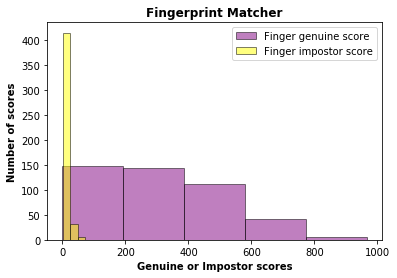

In [7]:
#4c

plt.hist(finger_genuine_file_list,label = "Finger genuine score", color='purple', 
         edgecolor = 'black',alpha =0.5, bins=5)

plt.hist(finger_impostor_file_list, label = "Finger impostor score", color='yellow',
         edgecolor = 'black',alpha =0.5, bins=3)

plt.xlabel('Genuine or Impostor scores', fontweight='bold')
plt.ylabel('Number of scores',fontweight='bold')
plt.title('Fingerprint Matcher',fontweight='bold')
plt.legend()

plt.show()

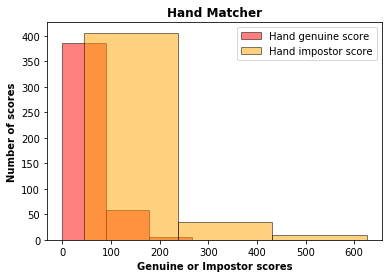

In [8]:
plt.hist(hand_genuine_file_list, label = "Hand genuine score", color='red',
         edgecolor = 'black',alpha =0.5,bins =3)

plt.hist(hand_impostor_file_list, label = "Hand impostor score", color='orange',
         edgecolor = 'black',alpha =0.5, bins =3)

plt.xlabel('Genuine or Impostor scores',fontweight='bold')
plt.ylabel('Number of scores',fontweight='bold')
plt.title('Hand Matcher',fontweight='bold')
plt.legend()


plt.show()

In [13]:
#4d

threshold = 500
false_match_rate_finger = 0
false_non_match_rate_finger = 0

for i in range(len(finger_genuine_file_list)): 
    if finger_genuine_file_list[i] <= threshold:
        false_non_match_rate_finger+=1
    
        
for count in range(len(finger_impostor_file_list)): 
    if finger_impostor_file_list[count] > threshold:
        false_match_rate_finger+=1


        
fmr_similarity=false_match_rate_finger/len(finger_impostor_file_list)
fnmr_similarity=false_non_match_rate_finger/len(finger_genuine_file_list)

print("False Match Rate Similarity = ",fmr_similarity*100)
print("False Non-Match Rate similarity = ",fnmr_similarity*100)

False Match Rate Similarity =  0.0
False Non-Match Rate similarity =  80.44444444444444


In [10]:
threshold = 300

false_match_rate_hand = 0
false_non_match_rate_hand = 0


for j in range (len(hand_genuine_file_list)):
    if hand_genuine_file_list[j] > threshold:
        false_non_match_rate_hand+=1
        

for count in range (len(hand_impostor_file_list)):
    if hand_impostor_file_list[count] <= threshold:
        false_match_rate_hand+=1

             
fmr_disimilarity=false_match_rate_hand/len(hand_impostor_file_list)
fnmr_disimilarity=false_non_match_rate_hand/len(hand_genuine_file_list)


print("False Match Rate Dissimilarity = ",round(fmr_disimilarity*100,2),"%")
print("False Non-Match Rate Dissimilarity = ",round(fnmr_disimilarity*100,2),"%")

False Match Rate Dissimilarity =  96.44 %
False Non-Match Rate Dissimilarity =  0.0 %


In [11]:
#4e

finger_maximum_value = int(max(max(finger_genuine_file_list),max(finger_impostor_file_list)))
finger_minimum_value = int(min(min(finger_genuine_file_list),min(finger_impostor_file_list)))


initial_value = finger_minimum_value

fmr_finger_similariy = []
fnmr_finger_similarity = []

for i in range (finger_minimum_value , finger_maximum_value,5):
    
    initial_value += 5
    
    false_match_rate_finger = 0
    false_non_match_rate_finger = 0

    for j in range(len(finger_genuine_file_list)): 
        if finger_genuine_file_list[j] < initial_value:
            false_non_match_rate_finger+=1

    for count in range(len(finger_impostor_file_list)): 
        if finger_impostor_file_list[count] >= initial_value:
            false_match_rate_finger+=1

    fmr_similarity=false_match_rate_finger/len(finger_impostor_file_list)
    fnmr_similarity=false_non_match_rate_finger/len(finger_genuine_file_list)

    fmr_finger_similariy.append(fmr_similarity)

    fnmr_finger_similarity.append(fnmr_similarity)

    

    

NameError: name 'LineString' is not defined

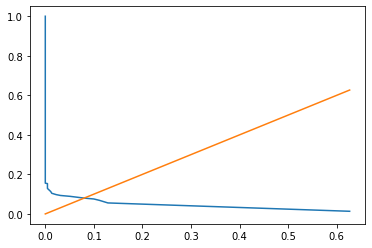

In [12]:
plt.plot(fmr_finger_similariy,fnmr_finger_similarity)
plt.plot(fmr_finger_similariy, fmr_finger_similariy)


first_line_finger = LineString(np.column_stack((fmr_finger_similariy,fnmr_finger_similarity)))
second_line_finger = LineString(np.column_stack((fmr_finger_similariy,fmr_finger_similariy)))
intersection_finger = first_line_finger.intersection(second_line_finger)
x_finger, y_finger = intersection_finger.xy
plt.plot(x_finger,y_finger,'r-o',color ='black', label = "EER")

plt.legend()
plt.xlabel('FMR',fontweight='bold')
plt.ylabel('FNMR',fontweight='bold')
plt.title("DET curve of Fingerprint matcher",fontweight='bold')
plt.show()
print("The equal error rate of finger matcher is = ",y_finger[0])


In [ ]:
#4e)

hand_maximum_value = int(max(max(hand_genuine_file_list),max(hand_impostor_file_list)))
hand_minimum_value = int(min(min(hand_genuine_file_list),min(hand_impostor_file_list)))


initial_value = hand_minimum_value

fmr_hand_disimilariy = []
fnmr_hand_disimilarity = []

for i in range (hand_minimum_value , hand_maximum_value,5):
    
    initial_value += 5
    
    false_match_rate_hand = 0
    false_non_match_rate_hand = 0
    
    for j in range (len(hand_genuine_file_list)):
        if hand_genuine_file_list[j] > initial_value:
            false_non_match_rate_hand+=1
        

    for count in range (len(hand_impostor_file_list)):
        if hand_impostor_file_list[count] <= initial_value:
            false_match_rate_hand+=1
            
    fmr_disimilarity=false_match_rate_hand/len(hand_impostor_file_list)
    fnmr_disimilarity=false_non_match_rate_hand/len(hand_genuine_file_list)

    fmr_hand_disimilariy.append(fmr_disimilarity)

    fnmr_hand_disimilarity.append(fnmr_disimilarity)

    

In [ ]:
plt.plot(fmr_hand_disimilariy,fnmr_hand_disimilarity)
plt.plot(fmr_hand_disimilariy, fmr_hand_disimilariy)


first_line_hand = LineString(np.column_stack((fmr_hand_disimilariy,fnmr_hand_disimilarity)))
second_line_hand = LineString(np.column_stack((fmr_hand_disimilariy,fmr_hand_disimilariy)))
intersection_hand = first_line_hand.intersection(second_line_hand)
x_hand, y_hand = intersection_hand.xy
plt.plot(x_hand,y_hand,'r-o',color ='black', label = "EER")


plt.legend()
plt.xlabel('FMR',fontweight='bold')
plt.ylabel('FNMR',fontweight='bold')
plt.title("DET curve of Hand matcher",fontweight='bold')
plt.show()
print("The equal error rate of hand matcher is = ",round(y_hand[0],3))

In [ ]:
#4f)
plt.plot(fmr_finger_similariy,fnmr_finger_similarity)


first_line_ten_percent = LineString(np.column_stack((fmr_finger_similariy,fnmr_finger_similarity)))
second_line_ten_percent = LineString(np.column_stack(([0.1,0.1],[0,1])))
intersection_ten_percent = first_line_ten_percent.intersection(second_line_ten_percent)
x_ten_percent, y_ten_percent = intersection_ten_percent.xy
plt.plot(x_ten_percent, y_ten_percent,'r-o',color ='red', label ='FMR = 10%')

first_line_five_percent = LineString(np.column_stack((fmr_finger_similariy,fnmr_finger_similarity)))
second_line_five_percent = LineString(np.column_stack(([0.05,0.05],[0,1])))
intersection_five_percent = first_line_five_percent.intersection(second_line_five_percent)
x_five_percent, y_five_percent = intersection_five_percent.xy
plt.plot(x_five_percent, y_five_percent,'r-o',color ='purple', label ='FMR = 5%')

first_line_one_percent = LineString(np.column_stack((fmr_finger_similariy,fnmr_finger_similarity)))
second_line_one_percent = LineString(np.column_stack(([0.01,0.01],[0,1])))
intersection_one_percent = first_line_one_percent.intersection(second_line_one_percent)
x_one_percent, y_one_percent = intersection_one_percent.xy
plt.plot(x_one_percent, y_one_percent,'r-o',color ='brown', label ='FMR = 1%')

plt.legend()
plt.xlabel('FMR',fontweight='bold')
plt.ylabel('FNMR',fontweight='bold')
plt.title("DET curve of Fingerprint matcher",fontweight='bold')
plt.show()
print("FNMR value of fingerprint matcher at FMR = 10% is =", round(y_ten_percent[0],3))
print("FNMR value of fingerprint matcher at FMR = 5% is =", round(y_five_percent[0],3))
print("FNMR value of fingerprint matcher at FMR = 1% is =", round(y_one_percent[0],3))

In [ ]:
#4f)

plt.plot(fmr_hand_disimilariy,fnmr_hand_disimilarity)


first_line_ten_percent = LineString(np.column_stack((fmr_hand_disimilariy,fnmr_hand_disimilarity)))
second_line_ten_percent = LineString(np.column_stack(([0.1,0.1],[0,1])))
intersection_ten_percent = first_line_ten_percent.intersection(second_line_ten_percent)
x_ten_percent, y_ten_percent = intersection_ten_percent.xy
plt.plot(x_ten_percent, y_ten_percent,'r-o',color ='red', label ='FMR = 10%')


first_line_five_percent = LineString(np.column_stack((fmr_hand_disimilariy,fnmr_hand_disimilarity)))
second_line_five_percent = LineString(np.column_stack(([0.05,0.05],[0,1])))
intersection_five_percent = first_line_five_percent.intersection(second_line_five_percent)
x_five_percent, y_five_percent = intersection_five_percent.xy
plt.plot(x_five_percent, y_five_percent,'r-o',color ='purple', label ='FMR = 5%')


first_line_one_percent = LineString(np.column_stack((fmr_hand_disimilariy,fnmr_hand_disimilarity)))
second_line_one_percent = LineString(np.column_stack(([0.01,0.01],[0,1])))
intersection_one_percent = first_line_one_percent.intersection(second_line_one_percent)
x_one_percent, y_one_percent = intersection_one_percent.xy
plt.plot(x_one_percent, y_one_percent,'r-o',color ='brown', label ='FMR = 1%')


plt.legend()
plt.xlabel('FMR',fontweight='bold')
plt.ylabel('FNMR',fontweight='bold')
plt.title("DET curve of Hand matcher",fontweight='bold')
plt.show()

print("FNMR value of hand matcher at FMR = 10% is =", round(y_ten_percent[0],3))
print("FNMR value of hand matcher at FMR = 5% is =", round(y_five_percent[0],3))
print("FNMR value of hand matcher at FMR = 1% is =", round(y_one_percent[0],3))

